# Jędrzej Sarna - symulacje

W pliku przedstawiam rozwiązania zadań. Poniżej funkcji zamieszczam przykładowe trajektorie dla przykładowo wybranych parametrów, wszystko można oczywiście zmieniać.

In [1]:
import numpy as np
from scipy.stats import norm
from math import sqrt
from pylab import plot
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

# Zadanie 1

# (a) proces Wienera

Opis działania funkcji. Na początku tworzę macierz zer, gdzie wiersze to różne trajektorie, a ich długość to liczba podjętych kroków. Z rozkładu normalnego generuję liczby odpowiadające za niezależne przyrosty, a następnie uzyskuję pozycje w danym momencie czasu za pomocą skumulowanej sumy przyrostów do danego momentu w czasie. W ten sposób uzyskuję macierz składającą się z różnych trajektorii.

In [2]:
def proces_Wienera(delta, T, N, m):
    W = np.zeros((m,N+1))
    W0=W[:, 0]
    dt=T/N
    r = norm.rvs(size=W0.shape + (N,), scale=delta*sqrt(dt))
    pos = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=pos)
    pos+=np.expand_dims(W0, axis=-1)
    t = np.linspace(0.0, T, N+1)
    for i in range(m):
        W[i,1:]=pos[i]
    for i in range(m):
        plot(t,W[i])
    plt.xlabel('t')
    plt.ylabel('W(t)')

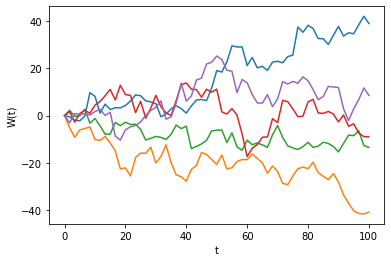

In [3]:
delta=3
czas=100
kroki=60
trajektorie=5
proces_Wienera(delta, czas, kroki, trajektorie)

# (b) most Browna

Opis działania funkcji. Całość opiera się na algorytmie dla procesu Wienera. Korzystam również z zależności, mówiącej, że jeżeli mamy standarowy proces Wienera z rozkładem normalnym, wartością oczekiwaną 0, wariancją $t$ oraz niezależnymi przyrostami to  $B(t)=W(t)-\dfrac{t}{T}W(t)$ jest mostem Browna.

In [4]:
def most_Browna(delta, T, N, m):
    W = np.zeros((m,N+1))
    W0=W[:, 0]
    dt=T/N
    r = norm.rvs(size=W0.shape + (N,), scale=delta*sqrt(dt))
    pos = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=pos)
    pos+=np.expand_dims(W0, axis=-1)
    t = np.linspace(0.0, T, N+1)
    for i in range(m):
        W[i,1:]=pos[i]
    B = np.zeros((m,N+1))
    for j in range(m):
        for i in range(len(W[j])):
            B[j,i]=((W[j][i]-(t[i]/T)*W[j][-1]))
    for i in range(m):
        plot(t,B[i])
    plt.xlabel('t')
    plt.ylabel('B(t)')

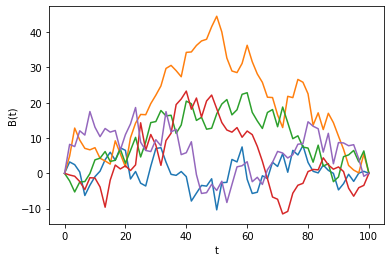

In [5]:
delta=3
czas=100
kroki=60
trajektorie=5
most_Browna(delta, czas, kroki, trajektorie)

# Zadanie 2

# Dwuwymiarowy proces Wienera

Opis działania funkcji. Całość opiera się na algorytmie dla procesu Wienera. Generuję dwa procesy Wienera i nanoszę je na jedną płaszczyznę. Zaznaczam, gdzie jest początek (zielona kropka) oraz koniec (czerwona kropka).

In [6]:
def proces_Wienera_2D(delta, T, N):
    W = np.zeros((2,N+1))
    W0=W[:, 0]
    dt=T/N
    r = norm.rvs(size=W0.shape + (N,), scale=delta*sqrt(dt))
    pos = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=pos)
    pos+=np.expand_dims(W0, axis=-1)
    t = np.linspace(0.0, T, N+1)
    for i in range(2):
        W[i,1:]=pos[i]
    plot(W[0],W[1])
    plot(W[0,0], W[1,0], 'go')
    plot(W[0,-1], W[1,-1], 'ro')
    plt.xlabel('$W_1(t)$')
    plt.ylabel('$W_2(t)$')

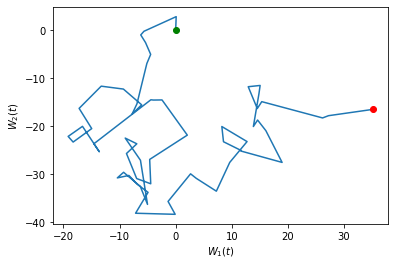

In [7]:
delta=3
czas=100
kroki=60
proces_Wienera_2D(delta, czas, kroki)

# Trójwymiarowy proces Wienera

Opis działania funkcji. Całość opiera się na algorytmie dla procesu Wienera. Generuję trzy procesy Wienera i nanoszę je na jeden układ współrzędnych. Zaznaczam, gdzie jest początek (zielona kropka) oraz koniec (czerwona kropka).

In [8]:
def proces_Wienera_3D(delta, T, N):
    W = np.zeros((3,N+1))
    W0=W[:, 0]
    dt=T/N
    r = norm.rvs(size=W0.shape + (N,), scale=delta*sqrt(dt))
    pos = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=pos)
    pos+=np.expand_dims(W0, axis=-1)
    t = np.linspace(0.0, T, N+1)
    for i in range(3):
        W[i,1:]=pos[i]
    ax = plt.axes(projection='3d')
    ax.plot3D(W[0],W[1],W[2])
    ax.scatter(W[0,0], W[1,0], W[2,0], color='green')
    ax.scatter(W[0,-1], W[1,-1], W[2,-1], color='red')
    ax.set_xlabel("$W_1(t)$")
    ax.set_ylabel("$W_2(t)$")
    ax.set_zlabel("$W_3(t)$")

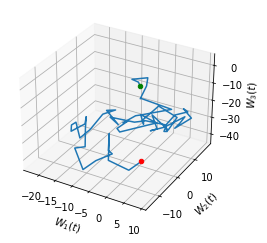

In [9]:
delta=3
czas=100
kroki=60
proces_Wienera_3D(delta, czas, kroki)

# Zadanie 3

Opis działania funkcji. Całość opiera się na algorytmie dla procesu Wienera. Generuję jedną trajektorię, wykonuję wykres $\dfrac{W(t)}{t}$ od $t$ i zwiększam czas, aby sprawdzić zależność. Obliczam również ostatnią pozycję w trajektorii i sprawdzam, czy jest bliska zeru.

In [10]:
def eksperyment_numeryczny(delta, T, N):
    W = np.zeros((1,N+1))
    W0=W[:, 0]
    dt=T/N
    r = norm.rvs(size=W0.shape + (N,), scale=delta*sqrt(dt))
    pos = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=pos)
    pos+=np.expand_dims(W0, axis=-1)
    t = np.linspace(0.0, T, N+1)
    W[0,1:]=pos[0]
    plot(t,W[0]/t)
    plt.xlabel('t')
    plt.ylabel('$\dfrac{W(t)}{t}$')
    print(W[0][-1]/t[-1])

-0.0006810473976638019


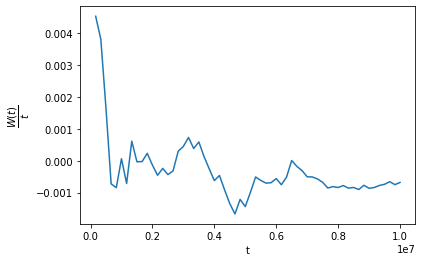

In [11]:
delta=3
czas=10000000
kroki=60
eksperyment_numeryczny(delta, czas, kroki)

Widzimy na podstawie obliczonego wyniku oraz wykresu, że wielkość $\dfrac{W(t)}{t}$zmierza do zera wraz ze wzrostem czasu. Można zwiększać czas i obserwować rezultat.